# Lab 1 Analysis Example using Thicket

In [54]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [55]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [56]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Barrier
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [57]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              94276197      1   
                                                  418437800     1   
                                                  940788505     1   
                                                  2039840440    1   
                                                  3176368580    1   
                                                  3211007287    1   
{'name': 'comm', 'type': 'function'}              94276197      3   
                                                  418437800     3   
                                                  940788505     3   
                                                  2039840440    3   
                                                  3176368580    3   
                                                  3211007287    3   
{'name': 'comm_large', 'type': 'function'}        94276197      4   
                                                  418437800     4   
                                                  940788505     4   
                                                  2039840440    4   
                                                  3176368580    4   
                                                  3211007287    4   
{'name': 'MPI_Barrier', 'type': 'function'}       94276197      5   
                                                  418437800     5   
                                                  940788505     5   
                                                  2039840440    5   
                                                  3176368580    5   
                                                  3211007287    5   
{'name': 'MPI_Gather', 'type': 'function'}        94276197      7   
                                                  418437800     7   
                                                  940788505     7   
                                                  2039840440    7   
                                                  3176368580    7   
                                                  3211007287    7   
{'name': 'MPI_Scatter', 'type': 'function'}       94276197      6   
                                                  418437800     6   
                                                  940788505     6   
                                                  2039840440    6   
                                                  3176368580    6   
                                                  3211007287    6   
{'name': 'comp', 'type': 'function'}              94276197      8   
                                                  418437800     8   
                                                  940788505     8   
                                                  2039840440    8   
                                                  3176368580    8   
                                                  3211007287    8   
{'name': 'comp_large', 'type': 'function'}        94276197      9   
                                                  418437800     9   
                                                  940788505     9   
                                                  2039840440    9   
                                                  3176368580    9   
                                                  3211007287    9   
{'name': 'correctness_check', 'type': 'function'} 94276197     10   
                                                  418437800    10   
                                                  940788505    10   
                                                  2039840440   10   
                                                  3176368580   10   
                                                  3211007287   10   
{'name': 'data_init', 'type': 'function'}         94276197      2   
                                                  418437800     2   
                                                  940788505 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [58]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,num_threads,group_num,implementation_source,Whole computation time
profile,,,,,,,,,,,,,,,,,,,,,,,,,
94276197,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-random.cali,true,1700106075,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, random]",c,MergeSort,MPI,int,4,1048576,2,1,19,Handwritten,0.238862
418437800,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a32-random.cali,true,1700104700,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 32, random]",c,MergeSort,MPI,int,4,32,4,1,19,Handwritten,0.008413
940788505,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a32-random.cali,true,1700104700,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 32, random]",c,MergeSort,MPI,int,4,32,2,1,19,Handwritten,0.001835
2039840440,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a1048576-random.cali,true,1700106014,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, random]",c,MergeSort,MPI,int,4,1048576,8,1,19,Handwritten,0.248287
3176368580,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a32-random.cali,true,1700105226,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 32, random]",c,MergeSort,MPI,int,4,32,8,1,19,Handwritten,0.015282
3211007287,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576-random.cali,true,1700106055,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, random]",c,MergeSort,MPI,int,4,1048576,4,1,19,Handwritten,0.240220


In [59]:
gb = tk.groupby("InputSize")

2  thickets created...
{32: <thicket.thicket.Thicket object at 0x2b691d5cf520>, 1048576: <thicket.thicket.Thicket object at 0x2b691cb72dc0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [60]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="mpi.world.size"
)

In [61]:
ctk.dataframe

32  \
                                                                 nid   
node                                              mpi.world.size       
{'name': 'main', 'type': 'function'}              2                1   
                                                  4                1   
                                                  8                1   
{'name': 'comm', 'type': 'function'}              2                3   
                                                  4                3   
                                                  8                3   
{'name': 'comm_large', 'type': 'function'}        2                4   
                                                  4                4   
                                                  8                4   
{'name': 'MPI_Barrier', 'type': 'function'}       2                5   
                                                  4                5   
                                                  8                5   
{'name': 'MPI_Gather', 'type': 'function'}        2                7   
                                                  4                7   
                                                  8                7   
{'name': 'MPI_Scatter', 'type': 'function'}       2                6   
                                                  4                6   
                                                  8                6   
{'name': 'comp', 'type': 'function'}              2                8   
                                                  4                8   
                                                  8                8   
{'name': 'comp_large', 'type': 'function'}        2                9   
                                                  4                9   
                                                  8                9   
{'name': 'correctness_check', 'type': 'function'} 2               10   
                                                  4               10   
                                                  8               10   
{'name': 'data_init', 'type': 'function'}         2                2   
                                                  4                2   
                                                  8                2   

                                                                                 \
                                                                   spot.channel   
node                                              mpi.world.size                  
{'name': 'main', 'type': 'function'}              2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'comm', 'type': 'function'}              2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'comm_large', 'type': 'function'}        2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'MPI_Barrier', 'type': 'function'}       2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'MPI_Gather', 'type': 'function'}        2               regionprofile   
                                                  4               regionprofile   
                                                  8               regionprofile   
{'name': 'MPI_Scatter', 'type': 'function'}       2               regionprofile   
                                                  4               regionprofile   
                             

Perform pandas operations to get the table in a desirable format for plotting

In [62]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (32, "nid"), (1048576, "nid")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])
ctk.dataframe

32                                   \
                                   spot.channel Min time/rank Max time/rank   
name              mpi.world.size                                              
main              2               regionprofile      0.276301      0.294068   
                  4               regionprofile      0.293434      0.294381   
                  8               regionprofile      0.436539      2.783748   
comm              2               regionprofile      0.001589      0.010193   
                  4               regionprofile      0.008167      0.017263   
                  8               regionprofile      0.015006      0.027748   
comm_large        2               regionprofile      0.001577      0.010159   
                  4               regionprofile      0.008155      0.017236   
                  8               regionprofile      0.014993      0.027721   
MPI_Barrier       2               regionprofile      0.001441      0.010045   
                  4               regionprofile      0.008035      0.017134   
                  8               regionprofile      0.013928      0.025969   
MPI_Gather        2               regionprofile      0.000024      0.000069   
                  4               regionprofile      0.000022      0.000041   
                  8               regionprofile      0.000020      0.000969   
MPI_Scatter       2               regionprofile      0.000039      0.000047   
                  4               regionprofile      0.000041      0.000045   
                  8               regionprofile      0.000042      0.001703   
comp              2               regionprofile      0.000019      0.000019   
                  4               regionprofile      0.000019      0.000019   
                  8               regionprofile      0.000019      0.000019   
comp_large        2               regionprofile      0.000009      0.000009   
                  4               regionprofile      0.000009      0.000009   
                  8               regionprofile      0.000009      0.000009   
correctness_check 2               regionprofile      0.000149      0.000149   
                  4               regionprofile      0.000167      0.000167   
                  8               regionprofile      0.000191      0.000191   
data_init         2               regionprofile      0.000042      0.000042   
                  4               regionprofile      0.000042      0.000042   
                  8               regionprofile      0.000057      0.000057   

                                                                              \
                                 Avg time/rank Total time Variance time/rank   
name              mpi.world.size                                               
main              2                   0.285184   0.570369           0.000079   
                  4                   0.293878   1.175511           0.000000   
                  8                   1.867643  14.941146           1.230016   
comm              2                   0.005891   0.011782           0.000019   
                  4                   0.014771   0.059086           0.000015   
                  8                   0.022052   0.176418           0.000017   
comm_large        2                   0.005868   0.011735           0.000018   
                  4                   0.014749   0.058995           0.000015   
                  8                   0.022026   0.176212           0.000017   
MPI_Barrier       2                   0.005743   0.011486           0.000019   
                  4                   0.014640   0.058558           0.000015   
                  8                   0.021263   0.170105           0.000014   
MPI_Gather        2                   0.000046   0.000093           0.000000   
                  4                   0.000027   0.000108           0.000000   
                  8                   0.000141   0.001128           0.00

In [63]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
print(processes)
array_sizes = [32,1048576] # append as necessary
print(array_sizes)

{'MPI_Scatter', 'comm', 'MPI_Gather', 'comp_large', 'correctness_check', 'MPI_Barrier', 'main', 'data_init', 'comm_large', 'comp'}
[2, 4, 8]
[32, 1048576]


In [64]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Min time/rank", "Max time/rank", "Avg time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

In [65]:
print(ctk.dataframe.loc["comp"][1048576])

                 spot.channel  Min time/rank  Max time/rank  Avg time/rank  \
mpi.world.size                                                               
2               regionprofile       0.206784       0.206784       0.206784   
4               regionprofile       0.207470       0.207470       0.207470   
8               regionprofile       0.207419       0.207419       0.207419   

                Total time  Variance time/rank  
mpi.world.size                                  
2                 0.206784                 0.0  
4                 0.207470                 0.0  
8                 0.207419                 0.0  


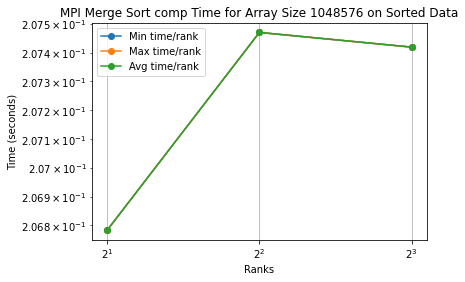

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'MPI Merge Sort comp Time for Array Size 1048576 on Sorted Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [66]:
name = "comp"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Min time/rank"],
        ctk.dataframe.loc[name][arraySize]["Max time/rank"],
        ctk.dataframe.loc[name][arraySize]["Avg time/rank"]
        ], 
    title="MPI Merge Sort {} Time for Array Size {} on Sorted Data".format(name, arraySize),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)